In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/Users/danielsigge/Desktop/Data Analytics/week-5/amz_uk_price_prediction_dataset.csv")
df = df[df.columns[df.isnull().mean() < 0.8]]
#print(df)

# Create the crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate True/False ratios (percentages)
crosstab_result_percentages = crosstab_result.div(crosstab_result.sum(axis=1), axis=0) * 100
sorted_percentages = crosstab_result_percentages.iloc[:, 1].sort_values(ascending=False)
sorted_percentages = crosstab_result_percentages.reindex(sorted_percentages.index)
top_20_percentages = sorted_percentages.head(20)  # Use head(20) for top 20
top_20_percentages = top_20_percentages.applymap('{:.1f}%'.format)
print("Most Bestsellers can be found in the following categories:\n",top_20_percentages)

Most Bestsellers can be found in the following categories:
 isBestSeller                    False True 
category                                   
Grocery                         94.2%  5.8%
Smart Home Security & Lighting  94.2%  5.8%
Health & Personal Care          94.2%  5.8%
Mobile Phone Accessories        95.8%  4.2%
Power & Hand Tools              96.5%  3.5%
Billiard, Snooker & Pool        96.8%  3.2%
Pet Supplies                    97.0%  3.0%
Home Brewing & Wine Making      97.2%  2.8%
Wind Instruments                97.2%  2.8%
Mirrors                         97.2%  2.8%
Professional Medical Supplies   97.3%  2.7%
PC & Video Games                97.5%  2.5%
Bakeware                        97.5%  2.5%
Material Handling Products      97.5%  2.5%
Bedding Accessories             97.6%  2.4%
Tableware                       97.6%  2.4%
Arts & Crafts                   97.6%  2.4%
Baby                            97.7%  2.3%
Lighting                        97.7%  2.3%
Window Treatment

/var/folders/nf/7hyyw1vs3vl3k9n8sglqt3vc0000gn/T/ipykernel_25789/2709935569.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_20_percentages = top_20_percentages.applymap('{:.1f}%'.format)


Chi-square statistic: 36540.20270061387
p-value: 0.0


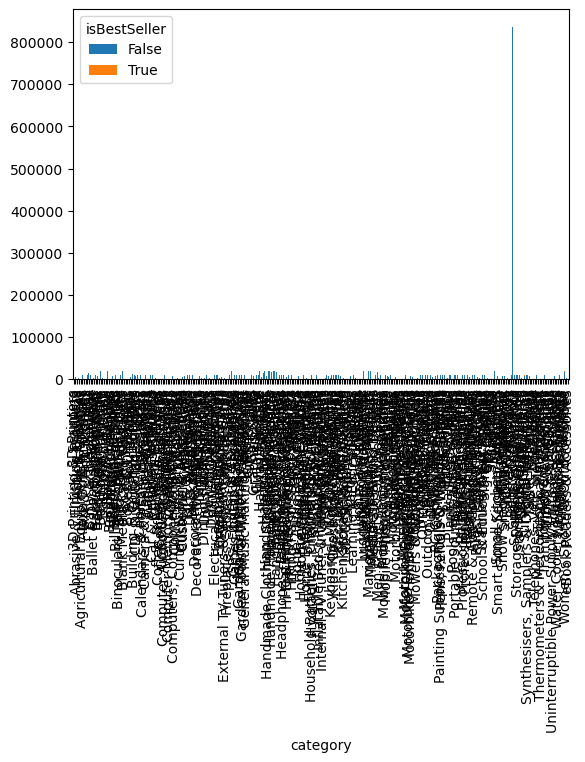

In [28]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, expected_counts, observed_counts = chi2_contingency(crosstab_result)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", chi2_p_value)

#cramers-test
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")
#The Cramér's V value of 0.122 suggests a weak association between the two variables. 
#Though statistically significant, the strength of this relationship is not very strong in practical terms.

#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab_result.plot(kind="bar", stacked=True);

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

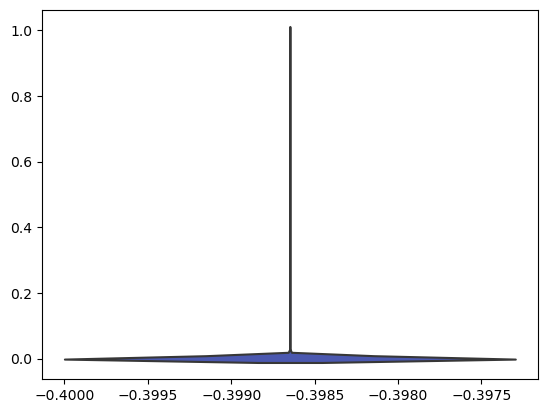

In [32]:
#Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.
filterino = crosstab_result.head(20)
sns.violinplot(data=df, x='category', y='isBestSeller', palette="coolwarm", hue='category', legend=False);

#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.
top_10_categories = df['category'].value_counts().nlargest(10)
sns.barplot(data=df, x='top_10_categories', y='isBestSeller', palette="coolwarm", hue='isBestSeller', legend=False);

#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
sns.barplot(data=df, x='top_10_categories', y='isBestSeller', palette="coolwarm", hue='isBestSeller', legend=False);

pearson corr: -0.12490673262148386
spearman corr: -0.13316425462433876


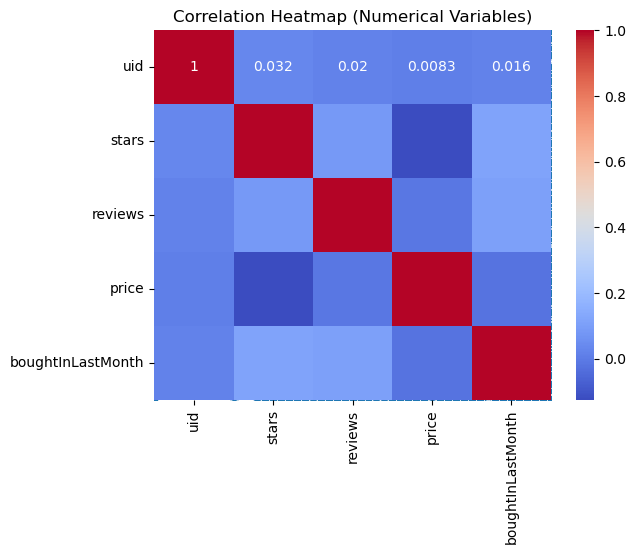

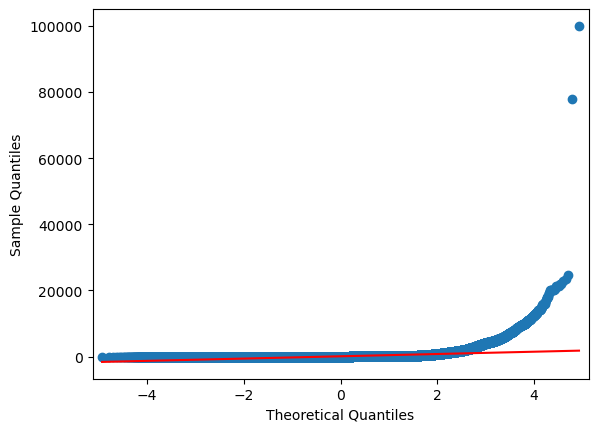

In [45]:
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

#perason
pearson_corr = df['price'].corr(df['stars'])
print("pearson corr:",pearson_corr)
#spearman
spearman_corr = df['price'].corr(df['stars'], method='spearman')
print("spearman corr:",spearman_corr)

#Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(data=df, x='stars', y='price');

#Use a correlation heatmap to visualize correlations between all numerical variables.

# 1. Select Numerical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])  # Selects numerical columns
# 2. Correlation Matrix
correlation_matrix = numerical_columns.corr()
# 3. Heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust 'cmap' for color scheme
# Customize the heatmap (optional)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

#Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');